Before you begin, execute this cell to import numpy and packages from the D-Wave Ocean suite, and all necessary functions for the gate-model framework you are going to use, whether that is the Forest SDK or Qiskit. In the case of Forest SDK, it also starts the qvm and quilc servers.

In [17]:
# %run -i "assignment_helper.py"
%matplotlib inline
from helper import * 
import matplotlib.pyplot as plt

# Quantum annealing

**Exercise 1** (2 points). The thermal state $\rho=\frac{1}{Z} \sum_n e^{-E_n/T} |n\rangle \langle n|$ is a Boltzmann distribution over the energy eigenvalues $E_n$ of some Hamiltonian $H$. An open quantum system equilibrates with the environment to this state. Equilibration is hard to simulate classically and therefore this process could be exploited for calculations. Using dimod, create a random Ising model over 5 spins.

In [9]:
import dimod 
import itertools

n_spins = 5


h = {v: np.random.uniform(-2, 2) for v in range(n_spins)}
J = {}

for u, v in itertools.combinations(h, 2):
    if np.random.random() < .05:
        J[(u, v)] = np.random.uniform(-1, 1)


In [10]:
model = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.SPIN)
sampler = dimod.SimulatedAnnealingSampler()


In [11]:
assert isinstance(model, dimod.binary_quadratic_model.BinaryQuadraticModel), "Wrong model type"
assert model.vartype == dimod.SPIN, "Wrong variables: binary model instead of spin system"
assert len(model.variables) == 5, "Wrong number of spins"

**Exercise 2** (2 points). Sample the model at near-zero temperature (0.01) and at a high temperature (100). Write the list of energies in two arrays, `energies_low` and `energies_high`. Note that $\beta$ denotes the inverse temperature $1/T$.

In [25]:
n_samples = 100

temperature_0 = 0.01
response = sampler.sample(model, beta_range=[1/temperature_0, 1/temperature_0], num_reads=n_samples)
energies_low = [solution.energy for solution in response.data()]
temperature_1 = 100
response = sampler.sample(model, beta_range=[1/temperature_1, 1/temperature_1], num_reads=n_samples)
energies_high = [solution.energy for solution in response.data()]

In [31]:
assert np.isclose(min(energies_low), max(energies_low)), "At near-zero temperature, we should only see one energy value, the ground state energy"
assert np.isclose(min(energies_high), min(energies_high)), "The ground state should appear at both temperatures"   

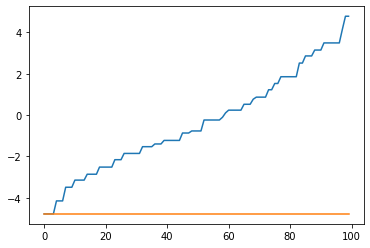

In [33]:
plt.plot(energies_high)
plt.plot(energies_low)

# Quantum Approximate Thermalization

**Exercise 3** (3 points). In QAOA, we approximated the ground state of a target Hamiltonian, starting from the ground state of a mixer Hamiltonian. We can actually perform the exact same optimization for approximating the thermal state of a target system, starting from the thermal state of some system.

We exploit that if we trace out a subsystem of an entangled system, we end up with a mixed state.

It can be shown that $| \psi \rangle =1/\sqrt{2 \cosh \frac{1}{2T}} \sum_{z \in {-1,1}} e^{- z/T} |z \rangle_{\mathcal{H_1}} \otimes | z \rangle_{\mathcal{H_2}}$ purifies $\rho=\frac{1}{Z}e^{- H_m/T}$ [[1](#1)], where $H_m$ is the mixing Hamiltonian in QAOA. This state can be built with a circuit composed uniquely of RX gates and CNOT gates. Since the overall structure of the algorithm resembles QAOA closely, it is less important to go through the details. Most of it is more about forcing the quantum computing packages to do what we want than about the problem itself. The biggest difference to QAOA is the preparation of the initial state. Prepare this state at inverse temperature $\beta=0$ in your preferred framework. Note that $\beta=1/T$, so this corresponds to the infinite temperature. The state preparation should be in an object called `circuit`.

In [35]:
n_qubits = 1
β = 0
qr = QuantumRegister(n_qubits*2)
cr = ClassicalRegister(n_qubits)
circuit = QuantumCircuit(qr,cr)



In [36]:
amplitudes = get_amplitudes(circuit)
assert np.allclose(amplitudes, np.array([1/np.sqrt(2), 0, 0, -1j/np.sqrt(2)]))

AssertionError: 

**Exercise 4** (1 points).  Create the density matrix for this quantum state in a variable called `dm`.

In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


If you look at the structure of this density matrix and trace out the ancilla system, you get $\begin{bmatrix}0.5&0\\0&0.5\end{bmatrix}$. That is the maximally mixed state, which corresponds to the thermal state at infinite temperature, which is exactly what we wanted.